In [57]:
import pandas as pd
import numpy as np

from pydataset import data

from scipy import stats
import os
import matplotlib.pyplot as plt

In [ ]:
alpha = 0.05

# ex1

In [ ]:
data = {
    "uses_a_macbook": [49, 20],
    "doesnt_use_a_macbook": [1, 30]
}
# Setting the index names
index_names = ["codeup_student", "not_codeup_student"]

In [ ]:
# Creating the DataFrame
observed = pd.DataFrame(data, index=index_names).T
observed

$H_0$: There is no relationship between whether a student is from codeup and whether they use a mac(independent).

$H_a$: There IS relationship between whether a student is from codeup and whether they use a mac(dependent).

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [ ]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject ')

# ex2

In [ ]:
# Load the dataset and store it in the variable mpg.

from pydataset import data
mpg = data('mpg')
mpg.head()

In [ ]:
alpha = .05

In [ ]:
mpg.cyl.value_counts()

In [ ]:
mpg.fl.value_counts()

$H_0$: There is no relationship between the vehicles cylinder count  and it's fuel(independent).

$H_a$: There IS a relationship between the vehicles cylinder count  and it's fuel(dependent).

In [ ]:
observed = pd.crosstab(mpg.cyl, mpg.fl)
observed

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [ ]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject null hypothesis (no relationship)')

# ex3

In [11]:
alpha= .05

$H_0$: There is no relationship between employee gender and whether they work in Marketing or Sales (independent).

$H_a$: There IS a relationship between employee gender and whether they work in Marketing or Sales (dependent).

In [12]:
#3. Create a function named get_db_url. 
def get_db_url(username, host, password, database_name):
    return f'mysql+pymysql://{username}:{password}@{host}/{database_name}'

In [13]:
from env import host, username, password
url = get_db_url(username, host, password, 'employees')
emp_df = pd.read_sql('''
Select emp_no, gender, dept_name
from employees
	join dept_emp using(emp_no) 
    join departments using(dept_no)
where to_date > NOW() and dept_name in ('Sales', 'Marketing')
order by emp_no 
''', url)

In [14]:
emp_df

,emp_no,gender,dept_name
0,10002,F,Sales
1,10016,M,Sales
2,10017,F,Marketing
3,10041,F,Sales
4,10050,M,Sales
...,...,...,...
52538,499976,M,Sales
52539,499980,M,Sales
52540,499986,F,Sales
52541,499987,F,Sales


In [15]:
observed = pd.crosstab(emp_df.gender, emp_df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [16]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [17]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [18]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject null hypothesis (no relationship)')

fail to reject null hypothesis (no relationship)


# ex 3b

In [25]:
from env import host, username, password
url = get_db_url(username, host, password, 'employees')
all_emps_df = pd.read_sql('''
Select emp_no, gender
from employees
 
''', url)

In [26]:
all_emps_df

,emp_no,gender
0,10001,M
1,10002,F
2,10003,M
3,10004,M
4,10005,M
...,...,...
300019,499995,F
300020,499996,M
300021,499997,M
300022,499998,M


In [27]:
mgrs_df = pd.read_sql('''
Select emp_no
from dept_emp
 
''', url)
mgrs_df

,emp_no
0,10017
1,10055
2,10058
3,10108
4,10140
...,...
331598,499965
331599,499978
331600,499982
331601,499983


In [32]:
all_emps_df['was_manager']= all_emps_df.emp_no in mgrs_df.emp_no

ValueError: Can only compare identically-labeled Series objects

In [30]:
all_emps_df.emp_no

0          10001
1          10002
2          10003
3          10004
4          10005
           ...  
300019    499995
300020    499996
300021    499997
300022    499998
300023    499999
Name: emp_no, Length: 300024, dtype: int64

In [38]:
for emp_no in all_emps_df:
    if emp_no in mgrs_df.emp_no:
        all_emps_df['was_manager']= True
    else: False

In [39]:
all_emps_df

,emp_no,gender
0,10001,M
1,10002,F
2,10003,M
3,10004,M
4,10005,M
...,...,...
300019,499995,F
300020,499996,M
300021,499997,M
300022,499998,M


# correlation ex

Answer with the type of stats test you would use (assume normal distribution):

>Is there a relationship between the length of your arm and the length of your foot?

correlation test> 
>Does smoking affect when or not someone has lung cancer?

chi 2
>Is gender independent of a person’s blood type?


chi 2
>Does whether or not a person has a cat or dog affect whether they live in an apartment?


chi2
>Does the length of time of the lecture correlate with a student's grade?


correlation test


## ex 2
Use the telco_churn data.

In [41]:
from env import host, username, password
url = get_db_url(username, host, password, 'telco_churn')
df_telco = pd.read_sql('''
select * FROM customers
 
''', url)

In [42]:
df_telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [78]:
df_telco['total_charges'] = pd.to_numeric(df_telco['total_charges'], errors='coerce')
df_telco = df_telco.dropna(subset=['total_charges', 'tenure'])

In [43]:
alpha = .05

## Does tenure correlate with monthly charges?

$H_0$: There is no relationship between tenure and monthly charges(independent).

$H_a$: There IS a relationship between tenure and monthly charges(dependent).

In [69]:
observed_telco = pd.crosstab(df_telco.tenure, df_telco.monthly_charges)
observed_telco

monthly_charges,18.25,18.40,18.55,18.70,18.75,18.80,18.85,18.90,18.95,19.00,...,117.35,117.45,117.50,117.60,117.80,118.20,118.35,118.60,118.65,118.75
tenure,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
p,r = stats.pearsonr(df_telco.tenure, df_telco.monthly_charges)

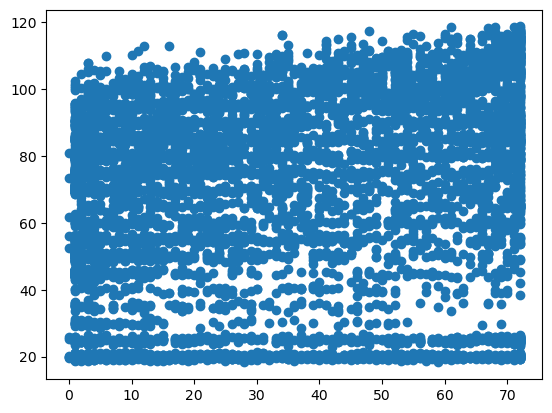

In [72]:
plt.scatter(df_telco.tenure, df_telco.monthly_charges)

In [62]:
corr, p = stats.pearsonr(df_telco.tenure, df_telco.monthly_charges)
corr, p

(0.24789985628615246, 4.094044991476844e-99)

In [63]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')


We reject the null hypothesis


## Total charges?

In [ ]:
df_telco = df_telco.drop

In [79]:
corr, p = stats.pearsonr(df_telco.tenure, df_telco.total_charges)
corr, p

(0.8258804609332071, 0.0)

In [80]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')


We reject the null hypothesis


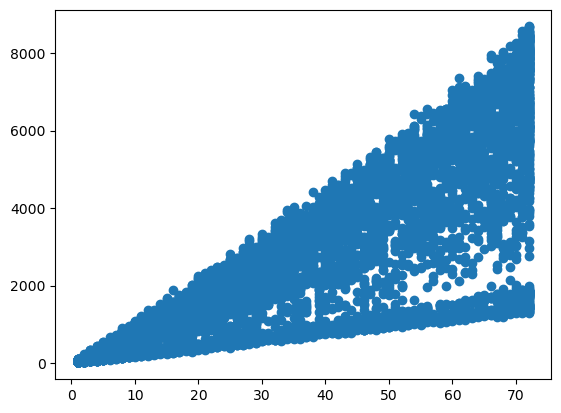

In [82]:
plt.scatter(df_telco.tenure, df_telco.total_charges)


## What happens if you control for phone and internet service?

In [83]:
df_telco.phone_service.value_counts()

phone_service
Yes    6352
No      680
Name: count, dtype: int64

In [86]:
df_telco.internet_service_type_id.value_counts()

internet_service_type_id
2    3096
1    2416
3    1520
Name: count, dtype: int64

# comparison of mean ex

In [91]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

## ex1
Answer with the type of test you would use (assume normal distribution):

In [87]:
## Is there a difference in grades of students on the second floor compared to grades of all students?
1 sample 1 tail t test # 1 sample vs population

In [88]:
## Are adults who drink milk taller than adults who don't drink milk?
categorical and continuous > 2 sample 1 tail t test #taller 1 tail

In [89]:
## Is the price of gas higher in Texas or in New Mexico?
2 sample 1 tail # higher 1 tail

In [90]:
## Are there differences in stress levels between students who take data science vs 
## students who take web development vs students who take cloud academy?
anova test # 3 samples

## ex2
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.
>2 sample 2 tail 

 - H$_0$ mean time of office #1 sales = mean time of office #2 sales
 - H$_a$ mean time of office #1 sales != mean time of office #2 sales

In [92]:
alpha = .05

In [93]:
mean1 = 90
mean2 = 100
nobs1 = 40
nobs2 = 50
std1 = 15
std2 = 20
α = 0.05

In [99]:
t ,p = stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2)

In [100]:
p

0.01020985244923939

In [102]:
t

-2.6252287036468456

In [104]:
p < alpha

True

In [106]:
#reject null hypothesis


## ex3
Load the mpg dataset and use it to answer the following questions:

In [109]:
mpg = data('mpg')
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
>2 sample groups, 2 tail

 - H$_0$ mean fuel efficiency 2008 = mean fuel efficiency 1999
 - H$_a$ mean fuel efficiency 2008 != mean fuel efficiency 1999

In [110]:
alpha = 0.5

In [114]:
mpg['avg_mpg']= (mpg.cty + mpg.hwy)/2
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [142]:
avg_2008 = mpg[mpg.year==2008].avg_mpg
avg_2008


3      25.5
4      25.5
7      22.5
10     24.0
11     23.0
14     21.0
15     20.0
17     21.0
18     19.5
19     17.0
20     13.0
21     17.0
23     14.5
26     21.0
27     20.0
28     19.5
29     16.5
30     12.5
34     26.0
36     23.5
37     21.5
42     20.5
43     20.5
44     14.0
47     19.5
48     19.5
49     17.0
50     16.0
53     16.5
54     16.5
55     10.5
59     15.0
60     10.5
61     15.0
63     15.5
65     14.0
66     10.5
67     15.0
68     15.0
69     14.0
70     10.5
73     15.0
77     15.0
81     16.0
82     16.0
88     15.0
90     15.0
93     21.5
94     20.0
97     19.0
98     18.5
99     17.0
105    30.0
106    30.5
107    30.0
108    25.0
111    25.5
112    26.0
115    23.5
118    24.0
119    23.5
120    20.5
121    20.0
122    20.5
123    19.5
124    17.0
127    10.5
128    16.5
129    15.5
130    12.5
132    15.0
133    15.0
137    15.0
139    16.0
140    16.0
144    27.0
145    27.5
146    23.0
147    22.5
150    22.0
153    17.0
154    15.0
158    23.0
159 

In [143]:
avg_1999 = mpg[mpg.year==1999].avg_mpg
avg_1999


1      23.5
2      25.0
5      21.0
6      22.0
8      22.0
9      20.5
12     20.0
13     21.0
16     19.5
22     15.0
24     21.0
25     19.0
31     13.0
32     15.5
33     23.0
35     22.0
38     21.0
39     20.5
40     19.0
41     19.0
45     18.5
46     18.0
51     15.0
52     15.5
56     14.0
57     13.0
58     15.0
62     13.5
64     13.0
71     13.0
72     13.5
74     13.0
75     14.0
76     14.0
78     15.5
79     17.0
80     15.5
83     15.0
84     15.5
85     15.5
86     14.5
87     14.5
89     13.0
91     22.0
92     21.5
95     18.0
96     18.5
100    30.5
101    28.0
102    28.5
103    26.0
104    28.0
109    22.0
110    22.5
113    22.0
114    22.0
116    22.5
117    24.0
125    17.5
126    15.5
131    13.0
134    13.0
135    14.0
136    13.5
138    15.5
141    15.0
142    25.0
143    23.0
148    22.0
149    22.0
151    15.5
152    16.0
155    22.0
156    21.0
157    22.0
160    21.5
161    21.0
166    23.5
167    22.5
168    22.5
169    22.5
174    17.5
175    18.0
176 

In [144]:
t, p = stats.ttest_ind(avg_1999, avg_2008)

In [145]:
t

0.21960177245940962

In [146]:
p

0.8263744040323578

In [149]:
p < alpha
#fail to reject null hypothesis

False

### Are compact cars more fuel-efficient than the average car?
>1 sample, 1 tail

 - H$_0$ compact cars are morefuel efficient than average
 - H$_a$ compact cars are not morefuel efficient than average

In [152]:
compact_cars = mpg[mpg['class']=='compact']

In [165]:
overall_avg= mpg.avg_mpg.mean()

In [166]:
compact_avg= compact_cars.avg_mpg

In [167]:
t, p = stats.ttest_1samp(compact_avg, overall_avg)

In [168]:
t

7.896888573132533

In [169]:
p

4.1985637943171486e-10

In [171]:
p < alpha
#reject null hypothesis

True

### Do manual cars get better gas mileage than automatic cars?
>2 sample 1 tail

 - H$_0$ manual cars are more  
 - H$_a$ compact cars are not morefuel efficient than average

In [175]:
manual_cars = mpg[mpg.trans.str.startswith('a')==False]

In [176]:
manual_cars

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0
13,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25,p,compact,21.0
15,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact,20.0
24,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater,21.0
26,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0
28,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5


In [177]:
auto_cars = mpg[mpg.trans.str.startswith('a')==True]

In [179]:
stats.binom(618, .10).sf(70)


0.1228196933987875